In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the pre-trained ResNet50 model
base_model = ResNet50(include_top=False, weights='imagenet', pooling='avg')

# Set the path to the directory containing your images
image_dir = "C:/Users/user/Desktop/Preprocessed Icon"


# Get the list of class directories
class_dirs = os.listdir(image_dir)

# Iterate over the class directories
for class_dir in class_dirs:
    # Construct the path to the class directory
    class_path = os.path.join(image_dir, class_dir)
    
    # Get the list of image file names in the class directory
    image_files = os.listdir(class_path)
    
    # Create an empty array to store the features
    features = []
    
    # Iterate over the images in the class directory
    for file in image_files:
        # Construct the image path
        image_path = os.path.join(class_path, file)
        
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        # Extract the features using the ResNet50 model
        feature = base_model.predict(x)
        
        # Append the feature to the array
        features.append(feature)
    
    # Convert the list of features to a numpy array
    features = np.array(features)
    
    # Save the features to a file
    save_path = os.path.join('C:/Users/user/Desktop/ex', class_dir + '.npy')
    np.save(save_path, features)

print('Feature extraction completed.')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score
import seaborn as sns

# Load the extracted features
eotc_features = np.load('C:/Users/user/Desktop/ex/EOTC_processed_RGB.npy')
non_eotc_features = np.load('C:/Users/user/Desktop/ex/non_EOTC_processed_RGB.npy')

# Create labels for the features (1 for EOTC, 0 for non-EOTC)
eotc_labels = np.ones(len(eotc_features))
non_eotc_labels = np.zeros(len(non_eotc_features))

# Concatenate features and labels
X = np.concatenate((eotc_features, non_eotc_features), axis=0)
y = np.concatenate((eotc_labels, non_eotc_labels), axis=0)

# Reshape features to match the input shape of the Xception model
X = X.reshape(X.shape[0], -1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape y_train to match the model's output shape
y_train = y_train.reshape(-1, 1)

# Initialize a simple feedforward neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=X_train.shape[1:]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define model checkpoints
model_filepath = "C:/Users/user/Desktop/model-{epoch:02d}-{val_accuracy:.4f}.keras"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)


# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Save the model
save_model(model, 'my_model')

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Calculate F1 score, precision, and recall
y_pred = model.predict(X_test)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as heatmap
class_names = ['eotc', 'non_eotc']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Epoch 1/30
66/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8137 - loss: 0.4270  
Epoch 1: val_accuracy improved from -inf to 0.90864, saving model to C:/Users/user/Desktop/model-01-0.9086.keras
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8202 - loss: 0.4135 - val_accuracy: 0.9086 - val_loss: 0.1967
Epoch 2/30
39/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9212 - loss: 0.2248 
Epoch 2: val_accuracy improved from 0.90864 to 0.94186, saving model to C:/Users/user/Desktop/model-02-0.9419.keras
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9291 - loss: 0.2007 - val_accuracy: 0.9419 - val_loss: 0.1489
Epoch 3/30
39/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9702 - loss: 0.0804 
Epoch 3: val_accuracy did not improve from 0.94186
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9703 - loss: 0.0855 - val_accuracy: 0.8904 - val_loss: 0.3032
Epoch 4/30
38/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9420 - loss: 0.1440 
Epoch 4: val_accuracy did not impr

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=my_model.

In [16]:
from tensorflow.keras.applications import ResNet50
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the pre-trained ResNet50 model
base_model = ResNet50(include_top=False, weights='imagenet', pooling='avg')

# Set the path to the directory containing your images
image_dir = "C:/Users/user/Desktop/dataset/Preprocessed Icon"

# Get the list of class directories
class_dirs = os.listdir(image_dir)

# Iterate over the class directories
for class_dir in class_dirs:
    # Construct the path to the class directory
    class_path = os.path.join(image_dir, class_dir)
    
    # Get the list of image file names in the class directory
    image_files = os.listdir(class_path)
    
    # Create an empty array to store the features
    features = []
    
    # Iterate over the images in the class directory
    for file in image_files:
        # Construct the image path
        image_path = os.path.join(class_path, file)
        
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        # Extract the features using the ResNet50 model
        feature = base_model.predict(x)
        
        # Append the feature to the array
        features.append(feature)
    
    # Convert the list of features to a numpy array
    features = np.array(features)
    
    # Save the features to a file
    save_path = os.path.join('C:/Users/user/Desktop/dataset/ResNetExtraction', class_dir + '.npy')
    np.save(save_path, features)

print('Feature extraction completed.')


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Epoch 1/30


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7532 - loss: 0.4774 
Epoch 1: val_accuracy improved from -inf to 0.91030, saving model to C:/Users/user/Desktop/dataset/ResNetExtraction/ResNetmodel-01-0.9103.keras
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7788 - loss: 0.4390 - val_accuracy: 0.9103 - val_loss: 0.2160
Epoch 2/30
39/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9368 - loss: 0.1715 
Epoch 2: val_accuracy improved from 0.91030 to 0.94850, saving model to C:/Users/user/Desktop/dataset/ResNetExtraction/ResNetmodel-02-0.9485.keras
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9392 - loss: 0.1650 - val_accuracy: 0.9485 - val_loss: 0.1403
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9570 - loss: 0.1118
Epoch 3: val_accuracy improved from 0.94850 to 0.95681, saving model to C:/Users/user/Desktop/dataset/ResNetExtraction/ResNetmodel-03-0.9568.keras
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9571 - loss: 0.1118 - val_accuracy: 

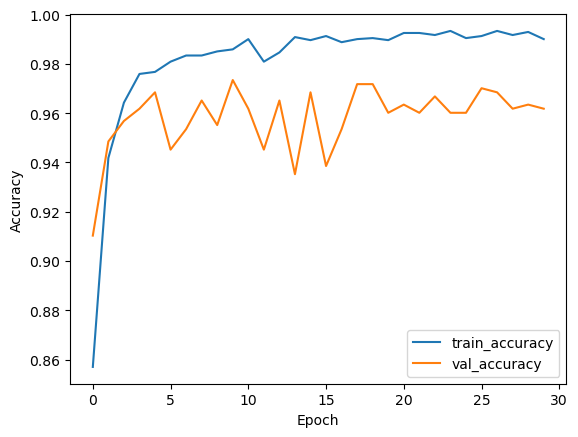

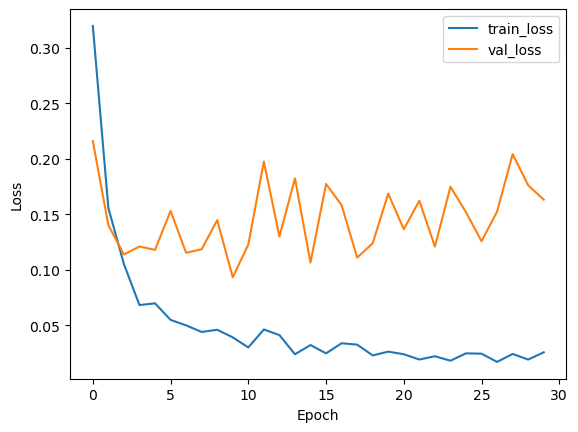

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
F1 Score: 0.9632000000000001
Precision: 0.9678456591639871
Recall: 0.9585987261146497


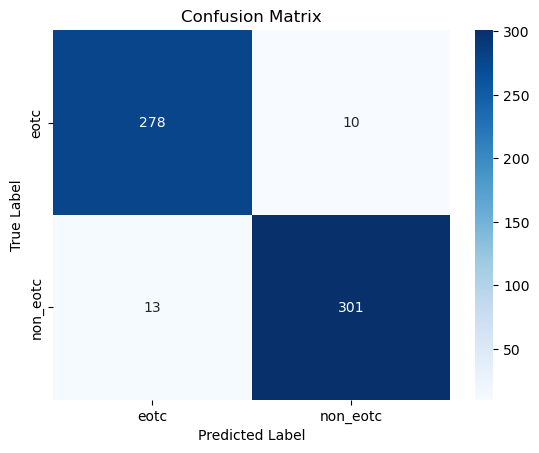

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score
import seaborn as sns

# Load the extracted features
eotc_features = np.load('C:/Users/user/Desktop/dataset/ResNetExtraction/EOTC_processed_RGB.npy')
non_eotc_features = np.load('C:/Users/user/Desktop/dataset/ResNetExtraction/non_EOTC_processed_RGB.npy')

# Create labels for the features (1 for EOTC, 0 for non-EOTC)
eotc_labels = np.ones(len(eotc_features))
non_eotc_labels = np.zeros(len(non_eotc_features))

# Concatenate features and labels
X = np.concatenate((eotc_features, non_eotc_features), axis=0)
y = np.concatenate((eotc_labels, non_eotc_labels), axis=0)

# Reshape features to match the input shape of the ResNet model
X = X.reshape(X.shape[0], -1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a simple feedforward neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=X_train.shape[1:]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define model checkpoints
model_filepath = "C:/Users/user/Desktop/dataset/ResNetExtraction/ResNetmodel-{epoch:02d}-{val_accuracy:.4f}.keras"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Save the model
save_model(model, 'my_model.keras')

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Calculate F1 score, precision, and recall
y_pred = model.predict(X_test)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as heatmap
class_names = ['eotc', 'non_eotc']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5744 - loss: 0.9608   
Epoch 1: val_accuracy improved from -inf to 0.76349, saving model to C:/Users/user/Desktop/dataset/ResNetExtraction/ResNetmodel.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5926 - loss: 0.9047 - val_accuracy: 0.7635 - val_loss: 0.4848
Epoch 2/100
37/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7618 - loss: 0.5253 
Epoch 2: val_accuracy improved from 0.76349 to 0.80290, saving model to C:/Users/user/Desktop/dataset/ResNetExtraction/ResNetmodel.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7683 - loss: 0.5019 - val_accuracy: 0.8029 - val_loss: 0.4115
Epoch 3/100
35/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7996 - loss: 0.4187 
Epoch 3: val_accuracy improved from 0.80290 to 0.82988, saving model to C:/Users/user/Desktop/dataset/ResNetExtraction/ResNetmodel.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8072 - loss: 0.4137 - val_accuracy: 0.8299 - val_loss: 0.3736

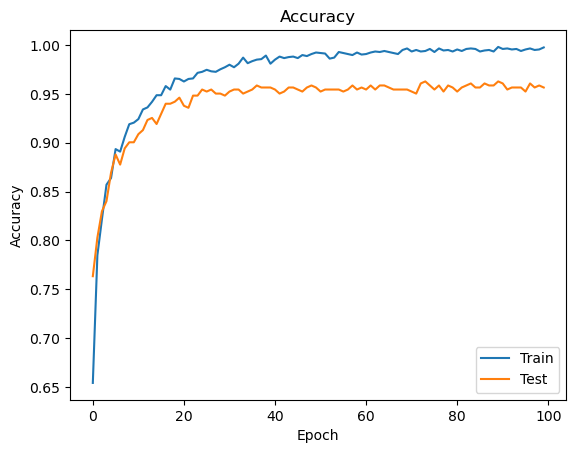

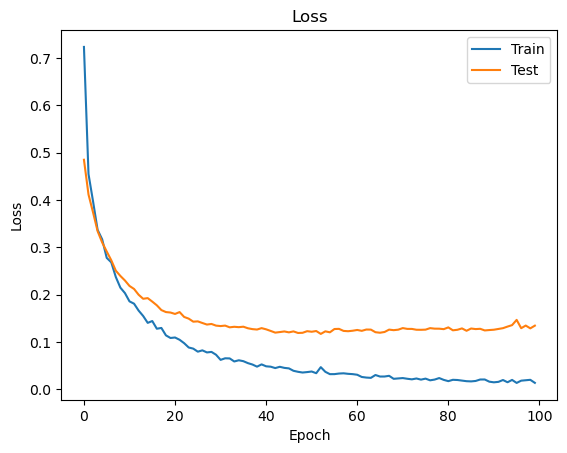

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
 [[301  13]
 [  6 282]]
              precision    recall  f1-score   support

        EOTC       0.98      0.96      0.97       314
    non-EOTC       0.96      0.98      0.97       288

    accuracy                           0.97       602
   macro avg       0.97      0.97      0.97       602
weighted avg       0.97      0.97      0.97       602



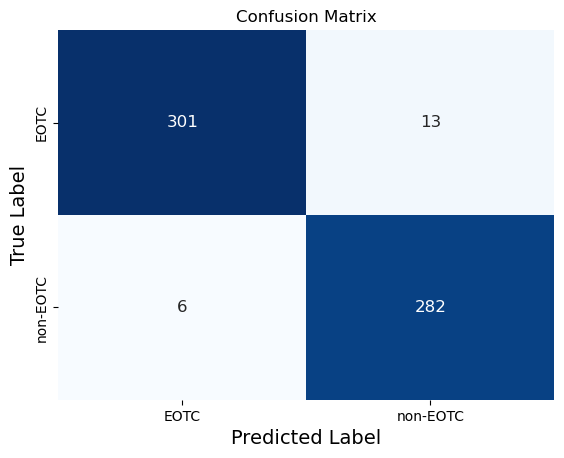

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 393,800 (1.50 MB)

 Trainable params: 131,266 (512.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 262,534 (1.00 MB)

In [11]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# define the paths to the extracted features
eotc_features_path = 'C:/Users/user/Desktop/dataset/ResNetExtraction/EOTC_processed_RGB.npy'
non_eotc_features_path = 'C:/Users/user/Desktop/dataset/ResNetExtraction/non_EOTC_processed_RGB.npy'

# define the classes
classes = ['EOTC', 'non-EOTC']

# define the feature paths
feats_paths = [eotc_features_path, non_eotc_features_path]

# load the features and labels
X = []
y = []
for i, feat_path in enumerate(feats_paths):
    features = np.load(feat_path)
    for feat in features:
        X.append(feat)
        y.append(i)
X = np.array(X)
y = to_categorical(y, num_classes=len(classes))

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the classification model using ResNet50
model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

# compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# define the checkpoint to save the best model
checkpoint_path = 'C:/Users/user/Desktop/dataset/ResNetExtraction/ResNetmodel.keras'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[checkpoint])

# evaluate the model on the train and test sets
model.load_weights(checkpoint_path)
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

# plot the training and testing accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# plot the training and testing losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# generate predictions on the testing set
y_pred = model.predict(X_test)

# convert true labels from one-hot encoded to integers
y_true = np.argmax(y_test, axis=1)

# generate a confusion matrix
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
print('Confusion Matrix:\n', cm)

# calculate and print the classification report
print(classification_report(y_true, np.argmax(y_pred, axis=1), target_names=classes))

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes,
            annot_kws={"fontsize":12}, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Print model summary
model.summary()


Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4901 - loss: 2.5613   
Epoch 1: val_accuracy improved from -inf to 0.64523, saving model to C:/Users/user/Desktop/dataset/VGG16Extraction/VGG16_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4996 - loss: 2.5281 - val_accuracy: 0.6452 - val_loss: 1.0226
Epoch 2/100
 1/61 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6875 - loss: 1.7691
Epoch 2: val_accuracy improved from 0.64523 to 0.71369, saving model to C:/Users/user/Desktop/dataset/VGG16Extraction/VGG16_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6104 - loss: 1.7889 - val_accuracy: 0.7137 - val_loss: 0.7946
Epoch 3/100
43/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6437 - loss: 1.2708 
Epoch 3: val_accuracy improved from 0.71369 to 0.71784, saving model to C:/Users/user/Desktop/dataset/VGG16Extraction/VGG16_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6449 - loss: 1.2576 - val_accuracy: 0.7178 - val_loss: 0.6711
Ep

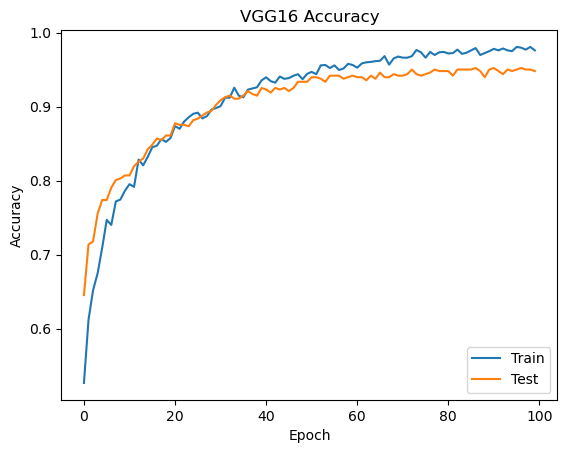

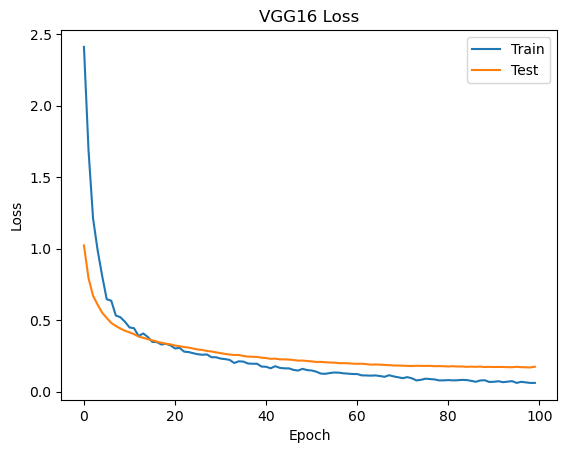

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
              precision    recall  f1-score   support

        EOTC       0.96      0.95      0.96       314
    non-EOTC       0.95      0.96      0.95       288

    accuracy                           0.96       602
   macro avg       0.95      0.96      0.96       602
weighted avg       0.96      0.96      0.96       602



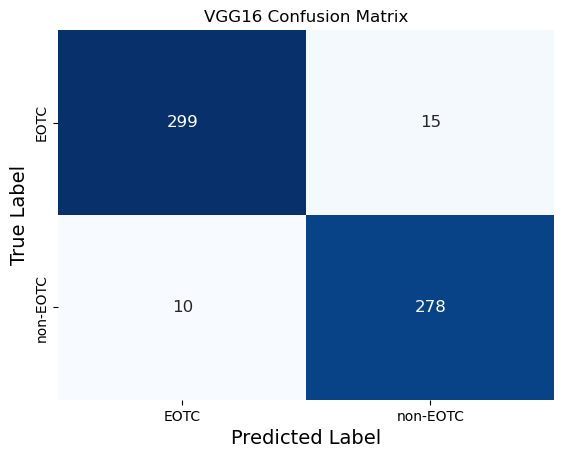

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,693 (385.52 KB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,796 (257.02 KB)

In [3]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# define the paths to the extracted features
eotc_features_path = 'C:/Users/user/Desktop/dataset/VGG16Extraction/EOTC_processed_RGB.npy'
non_eotc_features_path = 'C:/Users/user/Desktop/dataset/VGG16Extraction/non_EOTC_processed_RGB.npy'

# define the classes
classes = ['EOTC', 'non-EOTC']

# define the feature paths
feats_paths = [eotc_features_path, non_eotc_features_path]

# load the features and labels
X = []
y = []
for i, feat_path in enumerate(feats_paths):
    features = np.load(feat_path)
    for feat in features:
        X.append(feat)
        y.append(i)
X = np.array(X)
y = np.array(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the classification model using the pre-extracted features
model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# define the checkpoint to save the best model
checkpoint_path = 'C:/Users/user/Desktop/dataset/VGG16Extraction/VGG16_model.keras'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[checkpoint])

# evaluate the model on the train and test sets
model.load_weights(checkpoint_path)
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('VGG16 Train accuracy:', train_acc)
print('VGG16 Test accuracy:', test_acc)

# plot the training and testing accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# plot the training and testing losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# generate predictions on the testing set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# generate a confusion matrix
#cm = confusion_matrix(y_test, y_pred)
#print('Confusion Matrix:\n', cm)

# calculate and print the classification report
print(classification_report(y_test, y_pred, target_names=classes))

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes,
            annot_kws={"fontsize":12}, cbar=False)
plt.title('VGG16 Confusion Matrix')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Print model summary
model.summary()


Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 1/61 ━━━━━━━━━━━━━━━━━━━━ 37s 629ms/step - accuracy: 0.5312 - loss: 4.1089
Epoch 1: val_accuracy improved from -inf to 0.62033, saving model to C:/Users/user/Desktop/dataset/VGG16Extraction/VGG16_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5185 - loss: 3.6442 - val_accuracy: 0.6203 - val_loss: 2.0732
Epoch 2/100
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.6316 - loss: 2.5210
Epoch 2: val_accuracy improved from 0.62033 to 0.71369, saving model to C:/Users/user/Desktop/dataset/VGG16Extraction/VGG16_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6319 - loss: 2.5184 - val_accuracy: 0.7137 - val_loss: 1.8131
Epoch 3/100
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.7034 - loss: 1.9885
Epoch 3: val_accuracy improved from 0.71369 to 0.73444, saving model to C:/Users/user/Desktop/dataset/VGG16Extraction/VGG16_model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7033 - loss: 1.9878 - val_accuracy: 0.7344 - val_loss: 1.6781


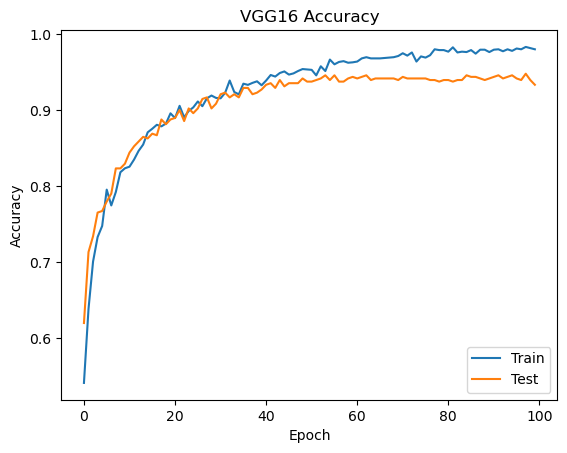

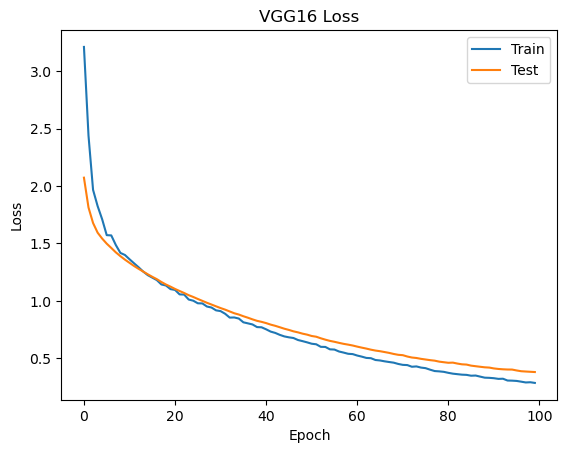

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

        EOTC       0.98      0.95      0.97       314
    non-EOTC       0.95      0.98      0.96       288

    accuracy                           0.97       602
   macro avg       0.96      0.97      0.97       602
weighted avg       0.97      0.97      0.97       602



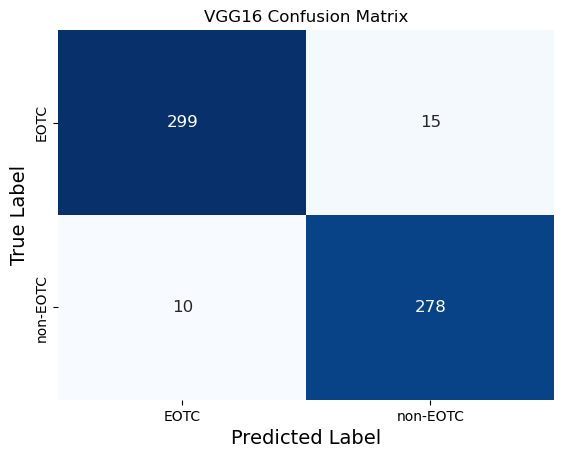

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,693 (385.52 KB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,796 (257.02 KB)

In [6]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

# define the paths to the extracted features
eotc_features_path = 'C:/Users/user/Desktop/dataset/VGG16Extraction/EOTC_processed_RGB.npy'
non_eotc_features_path = 'C:/Users/user/Desktop/dataset/VGG16Extraction/non_EOTC_processed_RGB.npy'

# define the classes
classes = ['EOTC', 'non-EOTC']

# define the feature paths
feats_paths = [eotc_features_path, non_eotc_features_path]

# load the features and labels
X = []
y = []
for i, feat_path in enumerate(feats_paths):
    features = np.load(feat_path)
    for feat in features:
        X.append(feat)
        y.append(i)
X = np.array(X)
y = np.array(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the classification model using the pre-extracted features
model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))
])
# compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# define the checkpoint to save the best model
checkpoint_path = 'C:/Users/user/Desktop/dataset/VGG16Extraction/VGG16_model.keras'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[checkpoint])

# evaluate the model on the train and test sets
model.load_weights(checkpoint_path)
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('VGG16 Train accuracy:', train_acc)
print('VGG16 Test accuracy:', test_acc)

# plot the training and testing accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# plot the training and testing losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# generate predictions on the testing set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# generate a confusion matrix
#cm = confusion_matrix(y_test, y_pred)
#print('Confusion Matrix:\n', cm)

# calculate and print the classification report
print(classification_report(y_test, y_pred, target_names=classes))

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes,
            annot_kws={"fontsize":12}, cbar=False)
plt.title('VGG16 Confusion Matrix')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Print model summary
model.summary()

Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5657 - loss: 2.0914 
Epoch 1: val_accuracy improved from -inf to 0.78405, saving model to C:/Users/user/Desktop/dataset/ResNetExtraction/ResNet_model.keras
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6018 - loss: 2.0020 - val_accuracy: 0.7841 - val_loss: 1.6009
Epoch 2/100
64/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7887 - loss: 1.5817
Epoch 2: val_accuracy improved from 0.78405 to 0.83389, saving model to C:/Users/user/Desktop/dataset/ResNetExtraction/ResNet_model.keras
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7902 - loss: 1.5756 - val_accuracy: 0.8339 - val_loss: 1.4356
Epoch 3/100
64/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8165 - loss: 1.4262
Epoch 3: val_accuracy improved from 0.83389 to 0.86379, saving model to C:/Users/user/Desktop/dataset/ResNetExtraction/ResNet_model.keras
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 1.4194 - val_accuracy: 0.8638 - val_loss: 1.2972


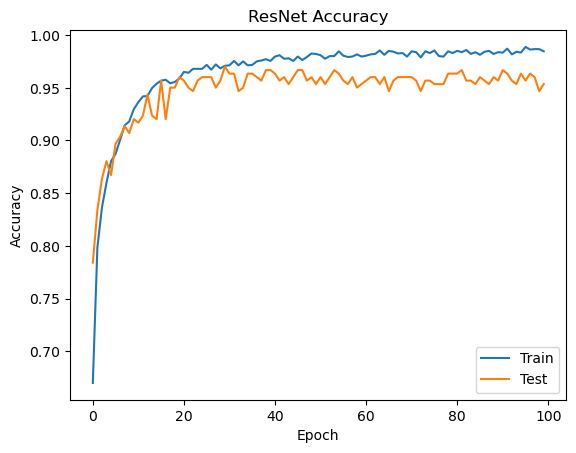

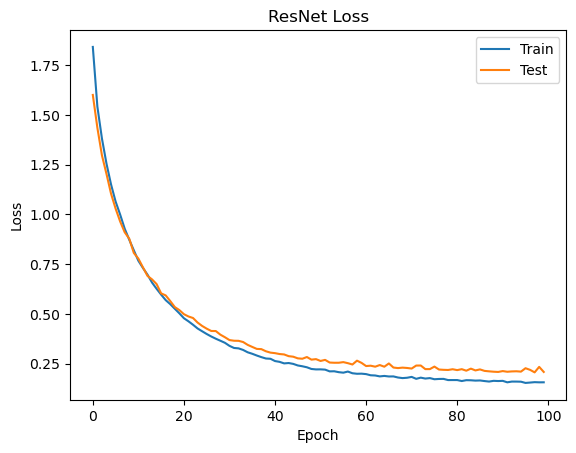

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix:
 [[144   7]
 [  4 146]]
              precision    recall  f1-score   support

        EOTC       0.97      0.95      0.96       151
    non-EOTC       0.95      0.97      0.96       150

    accuracy                           0.96       301
   macro avg       0.96      0.96      0.96       301
weighted avg       0.96      0.96      0.96       301



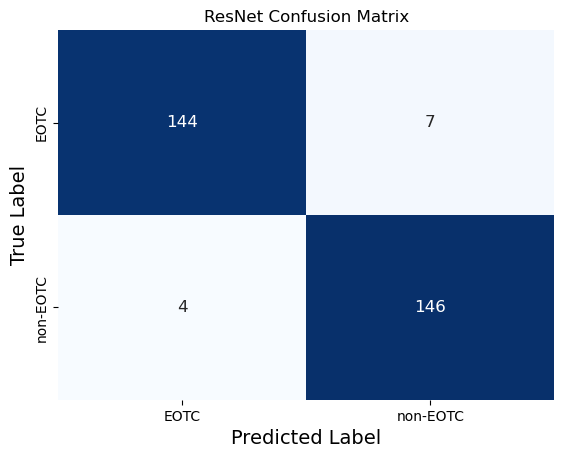

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 393,605 (1.50 MB)

 Trainable params: 131,201 (512.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 262,404 (1.00 MB)

In [9]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

# Define the paths to the extracted features
eotc_features_path = 'C:/Users/user/Desktop/dataset/ResNetExtraction/EOTC_processed_RGB.npy'
non_eotc_features_path = 'C:/Users/user/Desktop/dataset/ResNetExtraction/non_EOTC_processed_RGB.npy'

# Define the classes
classes = ['EOTC', 'non-EOTC']

# Define the feature paths
feats_paths = [eotc_features_path, non_eotc_features_path]

# Load the features and labels
X = []
y = []
for i, feat_path in enumerate(feats_paths):
    features = np.load(feat_path)
    for feat in features:
        X.append(feat)
        y.append(i)
X = np.array(X)
y = np.array(y)

# Split the data into train+val (90%) and test sets (10%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Split the train+val set into train (80%) and val (10% of total)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)

# Define the classification model using the pre-extracted features
model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define the checkpoint to save the best model
checkpoint_path = 'C:/Users/user/Desktop/dataset/ResNetExtraction/ResNet_model.keras'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[checkpoint])

# Evaluate the model on the train, val, and test sets
model.load_weights(checkpoint_path)
train_loss, train_acc = model.evaluate(X_train, y_train)
val_loss, val_acc = model.evaluate(X_val, y_val)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('ResNet Train accuracy:', train_acc)
print('ResNet Validation accuracy:', val_acc)
print('ResNet Test accuracy:', test_acc)

# Plot the training and validation accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot the training and validation losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ResNet Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Generate predictions on the testing set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Calculate and print the classification report
print(classification_report(y_test, y_pred, target_names=classes))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes,
            annot_kws={"fontsize":12}, cbar=False)
plt.title('ResNet Confusion Matrix')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Print model summary
model.summary()
